In [3]:
dataset = pd.read_csv('Patient Survey HCAHPS California.csv', encoding= "ISO-8859-1")

dataset.head()



,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
0,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,(510) 782-6200,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,72,28.0,Not Applicable,397,28.0,23,28.0,10/01/2022,09/30/2023
1,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,(510) 782-6200,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,8,28.0,Not Applicable,397,28.0,23,28.0,10/01/2022,09/30/2023
2,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,(510) 782-6200,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,20,28.0,Not Applicable,397,28.0,23,28.0,10/01/2022,09/30/2023
3,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,(510) 782-6200,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,88,397,28.0,23,28.0,10/01/2022,09/30/2023
4,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,(510) 782-6200,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,397,28.0,23,28.0,10/01/2022,09/30/2023


In [21]:
dataset.get('HCAHPS Question').iloc[2]



'Patients who reported that their nurses "Usually" communicated well'

In [4]:
from textblob import TextBlob

In [5]:
reviews = dataset['HCAHPS Question']

reviews

0        Patients who reported that their nurses "Alway...
1        Patients who reported that their nurses "Somet...
2        Patients who reported that their nurses "Usual...
3                  Nurse communication - linear mean score
4                        Nurse communication - star rating
                               ...                        
31522    Patients who reported YES, they would definite...
31523    Patients who reported YES, they would probably...
31524               Recommend hospital - linear mean score
31525                     Recommend hospital - star rating
31526                                  Summary star rating
Name: HCAHPS Question, Length: 31527, dtype: object

In [66]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [67]:
dataset['Sentiment Score'] = reviews.apply(get_sentiment)

In [68]:
dataset['Sentiment Score']

0        0.0000
1        0.0000
2       -0.2500
3       -0.3125
4        0.0000
          ...  
31522    0.0000
31523    0.0000
31524   -0.3125
31525    0.0000
31526    0.0000
Name: Sentiment Score, Length: 31527, dtype: float64

In [69]:
dataset[['HCAHPS Question','Sentiment Score']]

,HCAHPS Question,Sentiment Score
0,"Patients who reported that their nurses ""Alway...",0.0000
1,"Patients who reported that their nurses ""Somet...",0.0000
2,"Patients who reported that their nurses ""Usual...",-0.2500
3,Nurse communication - linear mean score,-0.3125
4,Nurse communication - star rating,0.0000
...,...,...
31522,"Patients who reported YES, they would definite...",0.0000
31523,"Patients who reported YES, they would probably...",0.0000
31524,Recommend hospital - linear mean score,-0.3125
31525,Recommend hospital - star rating,0.0000


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

In [72]:
def categorize_sentiment(percent):
    if percent >= 70:
        return 'Positive'
    elif percent >= 20:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the sentiment categorization to create a new column
dataset['Sentiment'] = dataset['HCAHPS Answer Percent'].apply(categorize_sentiment)

In [73]:
# Step 3: Prepare features and target variable
X_text = dataset['HCAHPS Question']  # The text data
X_numeric = dataset[['HCAHPS Answer Percent', 'Number of Completed Surveys']]  # Numerical features
y = dataset['Sentiment']  # The target variable

In [74]:
X_train_text, X_test_text, X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

In [75]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

In [76]:
# Step 6: Combine text and numerical features
X_train_combined = hstack((X_train_tfidf, X_train_numeric))
X_test_combined = hstack((X_test_tfidf, X_test_numeric))

In [57]:
# Step 7: Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter if needed
model.fit(X_train_combined, y_train)

LogisticRegression(max_iter=10000)

In [58]:
y_pred = model.predict(X_test_combined)

In [59]:
# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3617
     Neutral       1.00      1.00      1.00      1979
    Positive       1.00      1.00      1.00       710

    accuracy                           1.00      6306
   macro avg       1.00      1.00      1.00      6306
weighted avg       1.00      1.00      1.00      6306



In [33]:
# Optionally print the predictions
print("Predictions on the test set:")
for text, pred in zip(X_test_text, y_pred):
    print(f"Review: {text}\nPredicted Sentiment: {pred}\n")

Predictions on the test set:
Review: Patients who "Strongly Agree" they understood their care when they left the hospital
Predicted Sentiment: Neutral

Review: Patients who reported that the area around their room was "Usually" quiet at night
Predicted Sentiment: Neutral

Review: Recommend hospital - linear mean score
Predicted Sentiment: Negative

Review: Patients who reported that their room and bathroom were "Usually" clean
Predicted Sentiment: Negative

Review: Patients who reported that their nurses "Usually" explained things in a way they could understand
Predicted Sentiment: Neutral

Review: Patients who reported YES, they would probably recommend the hospital
Predicted Sentiment: Neutral

Review: Patients who reported that their doctors "Sometimes" or "Never"  treated them with courtesy and respect
Predicted Sentiment: Negative

Review: Patients who reported that they "Always" received help after using the call button as soon as they wanted
Predicted Sentiment: Neutral

Review:

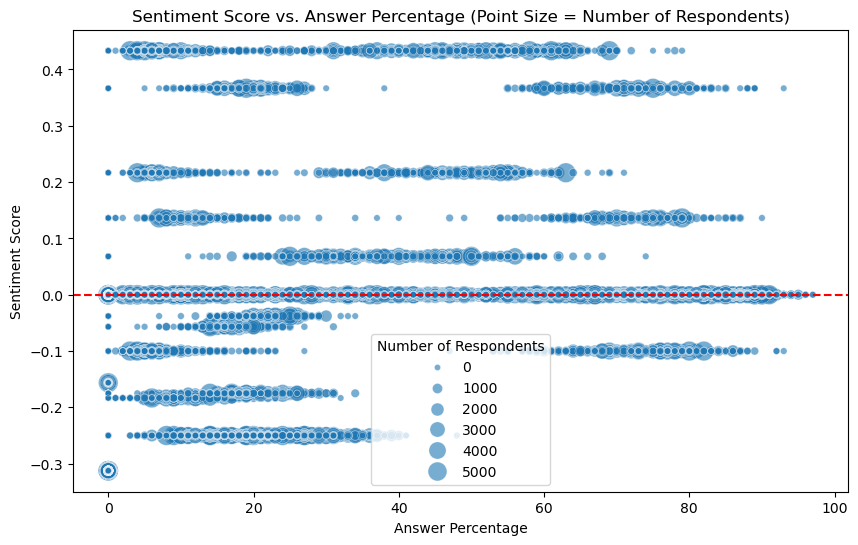

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Sentiment Score', 'HCAHPS Answer Percent', and 'Number of Respondents' to numeric
dataset['Sentiment Score'] = pd.to_numeric(dataset['Sentiment Score'], errors='coerce')
dataset['HCAHPS Answer Percent'] = pd.to_numeric(dataset['HCAHPS Answer Percent'], errors='coerce')
dataset['Number of Completed Surveys'] = pd.to_numeric(dataset['Number of Completed Surveys'], errors='coerce')

# Optionally handle NaN values (e.g., fill NaN with 0 or drop rows with NaNs)
dataset.fillna(0, inplace=True)  # You can also use dataset.dropna() to remove rows with NaNs

# Now you can create the weighted sentiment score
dataset['Weighted Sentiment Score'] = dataset['Sentiment Score'] * dataset['Number of Completed Surveys'] * (dataset['HCAHPS Answer Percent'] / 100)

plt.figure(figsize=(10, 6))

# Scatter plot with point size proportional to the number of respondents
sns.scatterplot(
    data=dataset, 
    x='HCAHPS Answer Percent', 
    y='Sentiment Score', 
    size='Number of Completed Surveys',  # Adjust the size of the points based on the number of respondents
    sizes=(20, 200),               # Minimum and maximum size of the points
    alpha=0.6                      # Slight transparency for better visibility
)

plt.title('Sentiment Score vs. Answer Percentage (Point Size = Number of Respondents)')
plt.xlabel('Answer Percentage')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.legend(title='Number of Respondents')
plt.show()

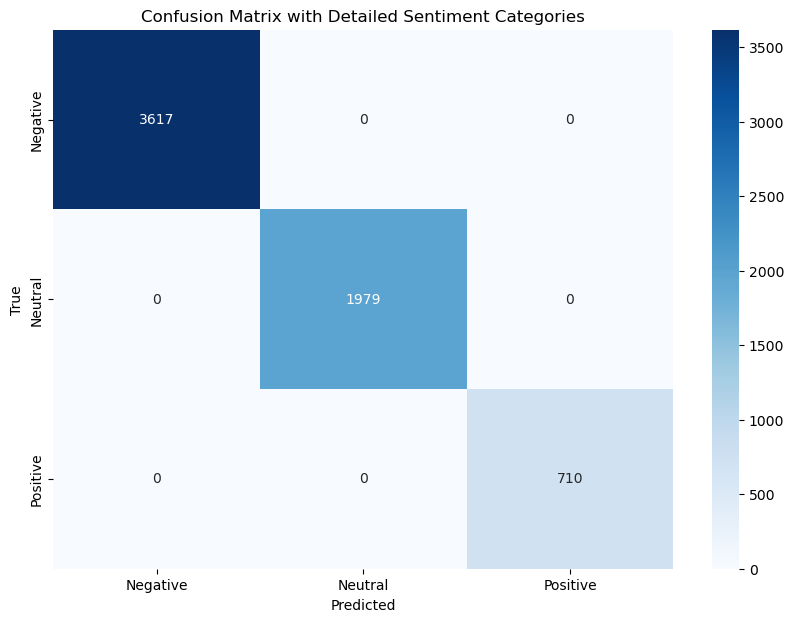

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have predictions y_pred
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Detailed Sentiment Categories')
plt.show()


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert 'Sentiment' column to a categorical type
dataset['Sentiment'] = pd.Categorical(dataset['Sentiment'], categories=['Positive', 'Neutral', 'Negative'], ordered=True)

# Step 1: Plot the distribution of predicted sentiments
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, 
              x='Sentiment', 
              order=dataset['Sentiment'].cat.categories,  # Ensure order is from categorical data
              palette='viridis')

# Step 2: Add sample reviews as annotations
# Sample a few reviews from each sentiment category for annotations
sentiment_samples = dataset.groupby('Sentiment').apply(lambda x: x.sample(min(len(x), 3))).reset_index(drop=True)

# Annotate the plot with sample reviews
for index, row in sentiment_samples.iterrows():
    # Ensure to reference the correct x position by finding the category index
    plt.text(row['Sentiment'].cat.codes[0], 0, row['Review'], rotation=45, ha='center', va='bottom', fontsize=9, color='black')

plt.title('Distribution of Detailed Sentiments with Sample Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/sk/k57rw5s944j3wc76nd2l445w0000gn/T/ipykernel_1399/1293237207.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Sentiment', order=dataset['Sentiment'].value_counts().index, palette='viridis')
/var/folders/sk/k57rw5s944j3wc76nd2l445w0000gn/T/ipykernel_1399/1293237207.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_samples = dataset.groupby('Sentiment').apply(lambda x: x.sample(min(len(x), 3))).reset_index(drop=True)
/var/folders/sk/k57rw5s944j3wc76nd2l445w0000gn/T/ipykernel_1399/1293237207.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, 

ConversionError: Failed to convert value(s) to axis units: 'Positive'

<Figure size 1200x600 with 1 Axes>

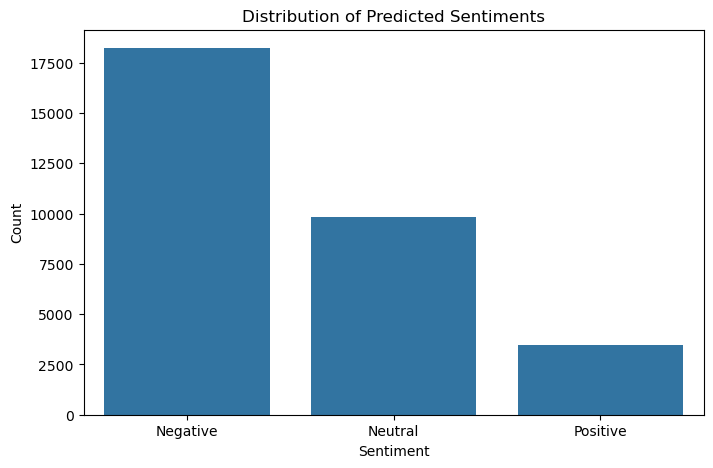

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Sentiment', order=dataset['Sentiment'].value_counts().index)
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()